# **Vision Transformer ViT**

In 2020, Google published a paper titled [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929). In this paper, they propse the Vision Transformer (ViT) a competitive alternative to convolutional neural networks (CNNs) that are currently state-of-the-art in computer vision and therefore widely used in different image recognition tasks.

## Abstract

This notebook explores the Vision Transformer ViT paper published by Google. Additionally, it uses the 🤗Hugging Face library to fine-tune a ViT for a simple image classification task.



## Table of Contents

>[Vision Transformer ViT](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=2No1Rrk-VQiO)

>>[Abstract](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=ReRfGnGSVQk3)

>>[Table of Contents](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=f286KgxoVQnU)

>>[Introduction](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=XB-N5krtXIcb)

>>[Inductive Biases of CNNs](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=8YTDh9LQZz98)

>>>[Inductive Reasoning](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=gqt1fUz8cbas)

>>>[Inductive Biases in Machine Learning](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=K3jDBV-CcWRX)

>>>[Hypothesis Space](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=R-jao7Kdfqtu)

>>>[Training Data Impact](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=cDVq-H4-iIZB)

>>>[Inductive Bias of CNNs](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=HfLaW6V_jV8w)

>>>>[Translation Equivariance](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=GqCdPD18pcW7)

>>>>[Translational Invariance](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=5ohweQA6pfGX)

>>[Transformers Need for Large-sized Datasets](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=mVzmIPEmr9_b)

>>[Vision Transformer ViT](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=8-FsGA8psm42)

>>[Fine-Tune ViT for Image Classification](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=BzPEkpukWiHE)

>>>[Setup and Imports](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=2-mP5e1QWny-)

>>>[Download the Dataset](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=FHQd29X9XF05)

>>>[Explore the Dataset](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=ZV39oy8gZFvg)

>>>[ViT Model](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=x8sal2aCZIHy)

>>>>[Feature Extractor](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=F2CdM9-LZeFK)

>>>>[Preprocessing the Dataset](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=aTUPlyKraEoK)

>>>>[Data Collation](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=2qyn8HxSbA1w)

>>>>[Evaluation Metric](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=HJywQwjMbgVA)

>>>>[Model Creation](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=-iGaJ-b9brry)

>>>>[Model Training](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=AXbnY05ccV2a)

>>>>[Model Evaluation](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=nxdy4K5BcwS_)

>>[References](#folderId=1X98MzHtd5tTnK7xAuQZLeaytHzD_TFwl&updateTitle=true&scrollTo=R1UVBOWsVYWn)



## Introduction

While the Transformer architecture has become the de-facto standard for natural
language processing tasks, its applications to computer vision remain limited. The paper shows that this reliance on CNNs is not necessary and a pure transformer applied directly to sequences of image patches can perform very well on image classification tasks.

Self-attention-based architectures, in particular Transformers ([Attention Is All You Need, 2017](https://arxiv.org/abs/1706.03762)) have become the standard model of choice in natural language processing (NLP). The dominant approach is to pre-train on a large text corpus and then fine-tune on a smaller task-specific datasets. Thanks to Transformers’ computational efficiency and scalability, it has become possible to train models of unprecedented size, with over 100B parameters. With the models and datasets growing, there is still no sign of saturating performance.

In computer vision, however, convolutional architectures remain the state-of-the-art. Inspired by the Transformer scaling successes in NLP, the paper experiment with applying a standardTransformer directly to images, with the fewest possible modifications from the original transformer architecture.

## Inductive Biases of CNNs

Inductive bias (also known as learning bias) of a learning algorithm is a set of assumptions that the learner uses to predict outputs of given inputs that it has not encountered. More specifically, they're the set of assumptions the restrict the hypothesis space of the model to areas with better generalization.


### Inductive Reasoning

Imagine it’s your first time in Switzerland, you hike in mountains and come across a cow with spots and a cowbell. You may assume that all spotted cows in Switzerland have a cowbell. This is a typical example of **inductive reasoning**. It starts with an observation (a cow with spots and a cowbell) and leads to a possible generalization hypothesis (all cows with spots have a cowbell).

Notice that it is possible to induce other hypotheses based on the same observation. For example:
- There are cows in Switzerland.
- There are only cows in Switzerland. 
- All cows have a cowbell regardless of having spots.
- Etc. 

As one can see, it is possible to make a dozen of hypotheses based on a single observation — this is an important property of inductive reasoning: valid observation may lead to different hypotheses and some of them can be false.

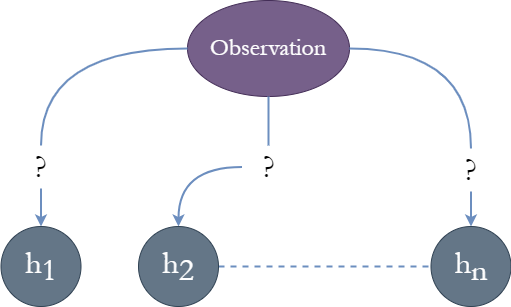

### Inductive Biases in Machine Learning

In machine learning tasks, we deal with some subset of observations (data points) and the goal is to create a generalization based on them. This generalization should be valid for new unseen data. In other words, the goal is to induce a general rule that works for the whole population of samples based on a limited sample subset.

So we have some set of observations and a set of hypotheses that can be induced based on them. The set of observations is our data and the set of hypotheses are ML algorithms with all the possible parameters that can be learned from this data. Each model can describe training data but provide significantly different results on new unseen data.



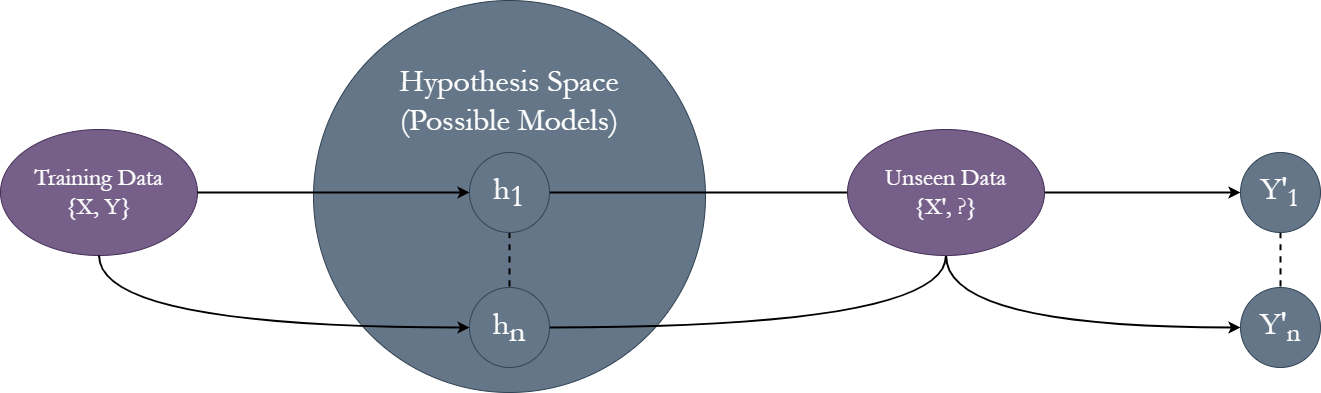

### Hypothesis Space

There is an infinite set of hypotheses for a finite set of samples. For example, consider the following observations of two points of some single-variable function. It is possible to fit a single linear model and an infinite amount of periodic or polynomial functions that perfectly fit the observations. Given the data, all of that functions are valid hypotheses that perfectly align with observations, and with no additional assumptions, choosing one over another is like making a random guess.

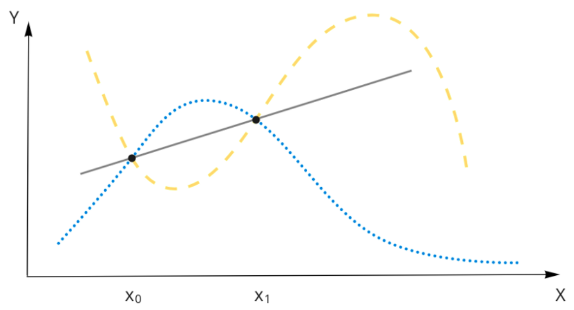

When inferring the hypothesis from the new unseen data, it turns out that most of the complicated functions are inaccurate. However, the linear function appears to be quite accurate, which should be already a familiar concept from a bias-variance tradeoff perspective.

The prioritization of some hypotheses (restriction of hypothesis space) is an inductive bias. So the model is biased toward some group of hypotheses. For the previous example, one can choose a linear model based on some prior knowledge about data and thus prioritize linear generalization.

### Training Data Impact

As one can see from the previous example, choosing the right induction bias of the model leads to better generalization, especially in a low data setting. The less training data we have, the stronger inductive bias should be to help the model to generalize well. But in a rich data setting, it may be preferable to avoid any induction bias to let the model be less constrained and search through the hypothesis space freely.

### Inductive Bias of CNNs

The main inductive biases of CNN architectures are locality and weight sharing.
- Locality implies that closely placed pixels are correlated to each other. 
- Weight sharing implies searching for specific patterns (e.g. edges). Thus, different parts of an image should be processed in the same way. 


#### Translation Equivariance

Two more inductive biases are usually implemented into CNNs: translation invariance with pooling layers and translation equivariance.

Translational Equivariance is a very important property of the convolutional neural networks where the position of the object in the image should not be fixed in order for it to be detected by the CNN. 

The property of translational equivariance is achieved in CNN’s by the concept of **weight sharing**. As the same weights are shared across the images, hence if an object occurs in any image it will be detected irrespective of its position in the image. This property is very useful for applications such as image classification, object detection, etc. where there may be multiple occurrences of the object or the object might be in motion.

Convolutional Neural Networks are not naturally equivariant to some other transformations such as changes in the scale or rotation of the image. Other mechanisms are required to handle such transformations.

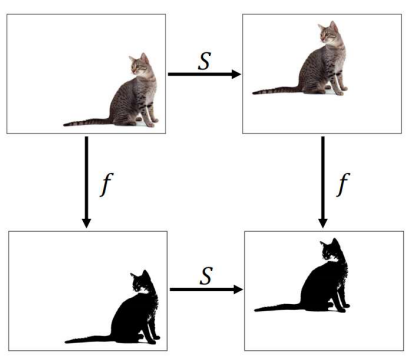

#### Translational Invariance

 Translational Invariance makes the CNN invariant to translation. Invariance to translation means that if we translate the inputs the CNN will still be able to detect the class to which the input belongs.

Translational Invariance is a result of the **pooling operation**. In a traditional CNN architecture, there are three stages. 
  - In the first stage, the layer performs convolution operation on the input to give linear activations. 
  - In the second stage, the resultant activations are passed through a non-linear activation function such as sigmoid, tanh or relu. 
  - In the third stage, we perform the pooling operation to modify the output further.

In pooling operation, we replace the output of the convnet at a certain location with a summary statistic of the nearby outputs such a maximum in case of Max Pooling. As we replace the output with the max in case of max-pooling, hence even if we change the input slightly, it won’t affect the values of most of the pooled outputs. Translational Invariance is a useful property where the exact location of the object is not required. For e.g if you are building a model to detect faces all you need to detect is whether eyes are present or not, it’s exact position is not necessary. While in segmentation tasks, the exact position is required.

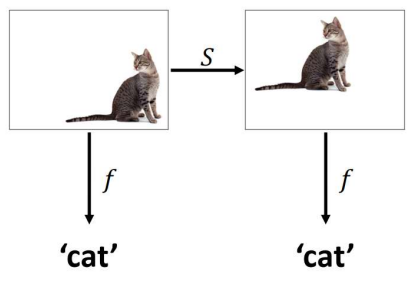

## Transformers Need for Large-sized Datasets

While transformers are permutation invariant by design, due to their inclusion of positional embeddings, they lack some of the inductive biases inherent to CNNs, such as translation equivariance and locality, and therefore do not generalize well when trained on insufficient amounts of data. However, the paper suggests that large scale training of ViTs trumps inductive bias.

## Vision Transformer ViT

The Vision Transformer the original Transformer ([Vaswani et al., 2017](https://arxiv.org/abs/2010.11929) as closely as possible.

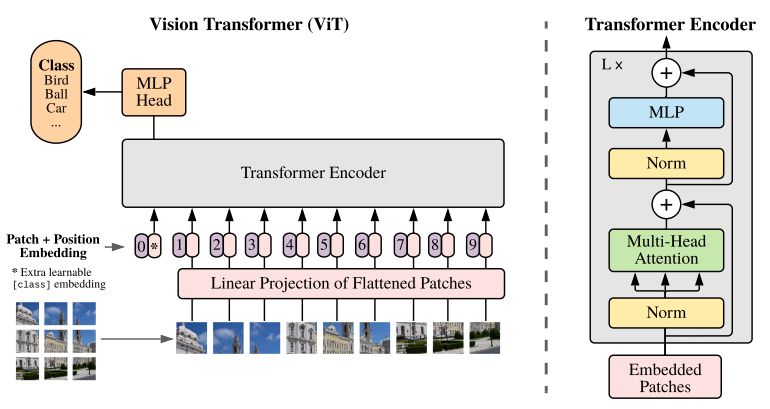

The standard Transformer receives as input a 1D sequence of token embeddings. To handle 2D images, the image $x \in R^{W \times H \times C}$ is reshaped into sequence of flattened 2D patches $x_p \in R^{N \times (P^2 \cdot C)}$, where

- $(H, W)$ is the resolution of the input image.
- $C$ is the number of channels.
- $(P, P)$ is the resolution of each image patch.
- $N$ is the number of image patches $N = \frac{HW}{P^2}$, which is also the effective input sequence length for the transformer.

The Transformer uses constant latent vector size $D$ through all of its layers, so the patches are flattened and mapped to $D$ dimensional vectors with a trainable linear projection. The output of this projection is referred to as the patch embeddings.

Similar to BERT’s `[class]` token, a learnable embedding is prepended to the sequence of embedded patches, whose state at the output of the Transformer encoder serves as the image representation. Both during pre-training and fine-tuning, a classification head is attached to it. The classification head is implemented by a MLP with one hidden layer at pre-training time and by a single linear layer at fine-tuning time.

**Position embeddings** are added to the patch embeddings to retain positional information. Standard learnable 1D position embeddings are used, since no observed significant performance gains were observed from using more advanced 2D-aware position embeddings. The resulting sequence of embedding vectors serves as input to the encoder.


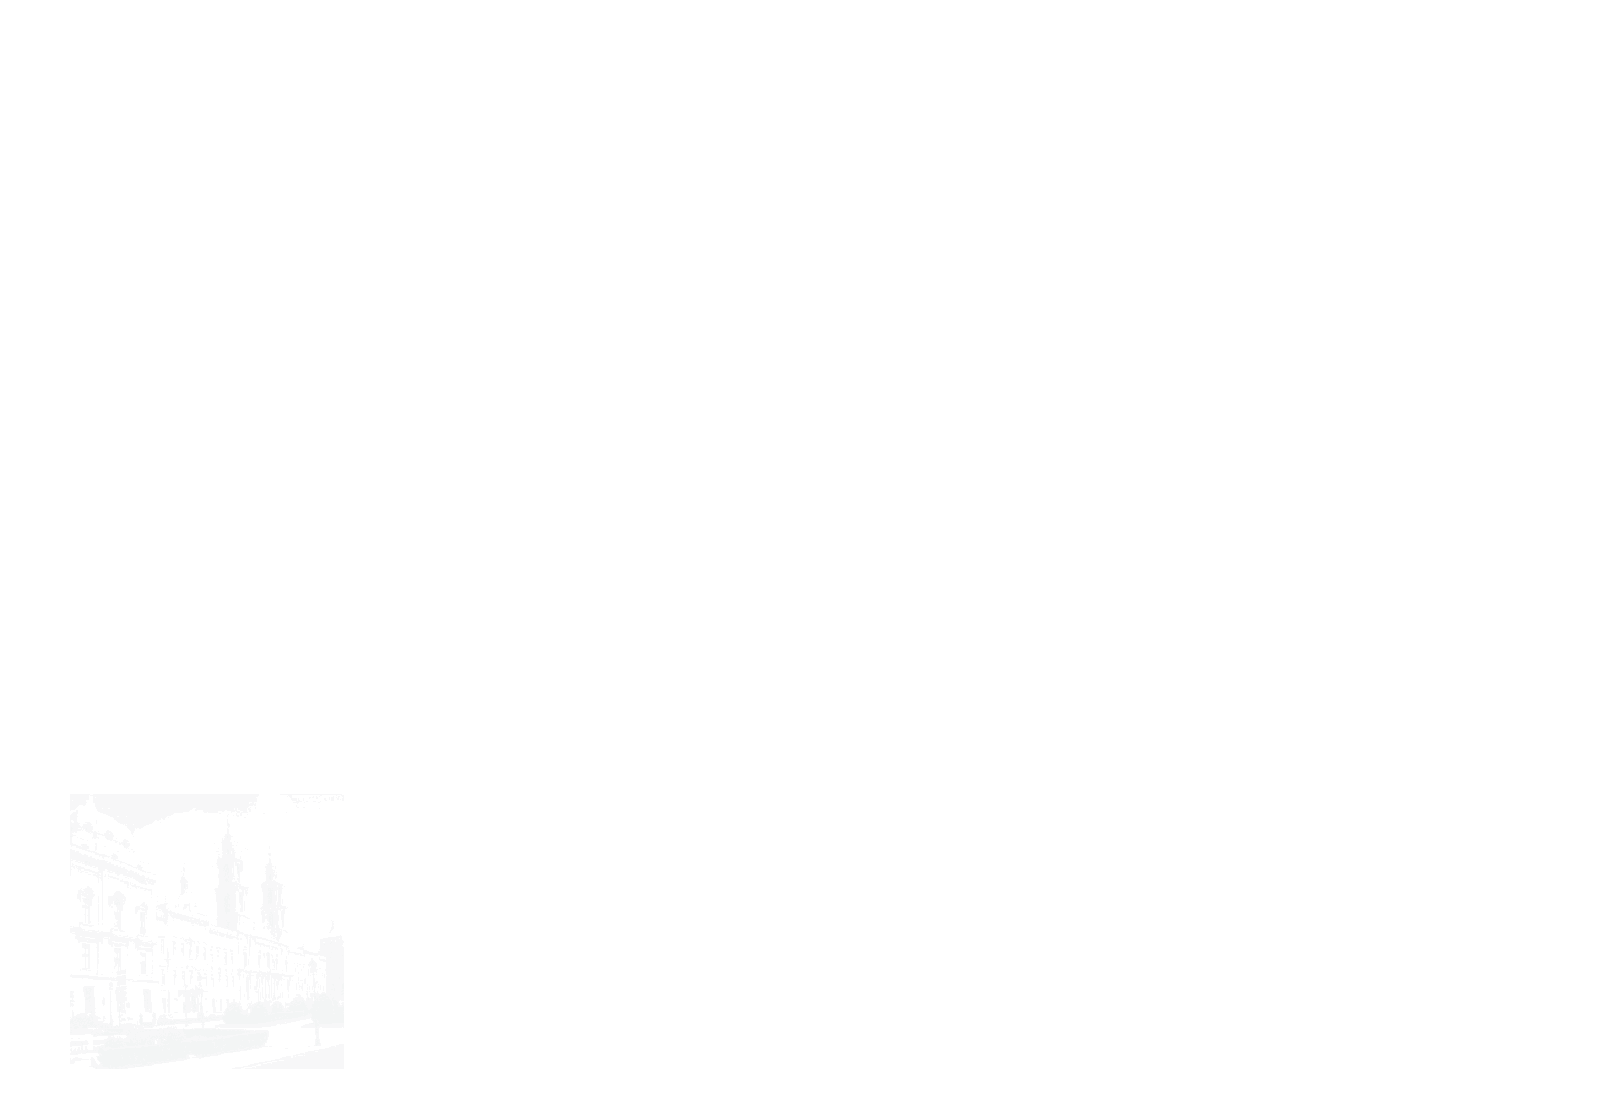

## Fine-Tune ViT for Image Classification


### Setup and Imports

In [1]:
!pip install datasets transformers -q

     |████████████████████████████████| 441 kB 7.2 MB/s 
     |████████████████████████████████| 5.3 MB 55.9 MB/s 
     |████████████████████████████████| 115 kB 65.8 MB/s 
     |████████████████████████████████| 163 kB 62.1 MB/s 
     |████████████████████████████████| 212 kB 68.9 MB/s 
     |████████████████████████████████| 127 kB 68.1 MB/s 
     |████████████████████████████████| 7.6 MB 53.4 MB/s 


In [26]:
import numpy as np
import torch

from datasets import load_dataset, load_metric
from transformers import TrainingArguments, Trainer
from transformers import ViTFeatureExtractor, ViTForImageClassification

### Download the Dataset

The [beans](https://huggingface.co/datasets/beans) dataset is a collection of pictures of healthy and unhealthy bean leaves.

In [3]:
dataset = load_dataset("beans")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

### Explore the Dataset

The dataset consists of train, validation, and test subsets. Each data point from the dataset has 3 features:

- `image_file_path`: The str path to the image file that was loaded as image
- `image`: A PIL Image
- `labels`: A datasets.ClassLabel feature, which is an integer representation of the label.

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [8]:
example_instance = dataset["train"][0]
example_instance

{'image_file_path': '/root/.cache/huggingface/datasets/downloads/extracted/b0a21163f78769a2cf11f58dfc767fb458fc7cea5c05dccc0144a2c0f0bc1292/train/healthy/healthy_train.233.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7F5E33727FD0>,
 'labels': 2}

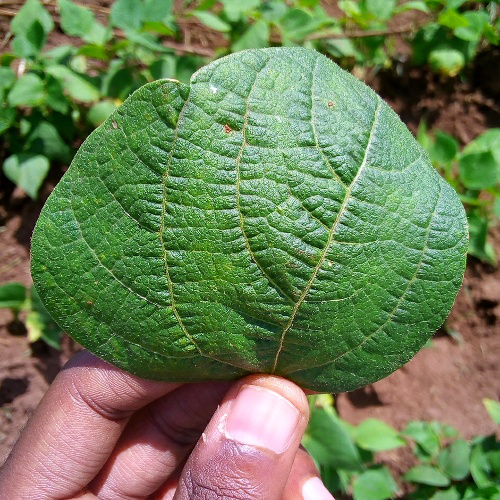

In [9]:
example_instance["image"]

In [7]:
labels = dataset["train"].features["labels"]
labels

ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)

In [10]:
labels.int2str(example_instance["labels"])

'healthy'

### ViT Model

#### Feature Extractor

When ViT models are trained, specific transformations are applied to images fed into them. To make sure the correct transformations are applied ViTFeatureExtractor is used and initialized with a configuration that was saved along with the pretrained model.

In [12]:
vit_model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(vit_model_name)

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [13]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

To process an image, simply pass it to the feature extractor's call function. This will return a dict containing pixel values, which is the numeric representation to be passed to the model.

We get a NumPy array by default, but if we add the return_tensors="pt" argument, we'll get back torch tensors instead.

#### Preprocessing the Dataset

While we could call `ds.map` and apply this to every example at once, this can be very slow, especially if we use a larger dataset. Instead, we can apply a transform to the dataset. Transforms are only applied to the instances as we index them.

First, though, we'll need to define a preprocess function that accepts a batch of data, as that's what `ds.with_transform` expects.

In [14]:
def transform(batch):
    inputs = feature_extractor([x for x in batch["image"]], return_tensors="pt")
    inputs["labels"] = batch["labels"]
    return inputs

In [15]:
preprocessed_dataset = dataset.with_transform(transform)

#### Data Collation

In [20]:
def collate(batch):
  return {
      "pixel_values": torch.stack([x["pixel_values"] for x in batch]),
      "labels": torch.tensor([x["labels"] for x in batch])
  }

#### Evaluation Metric

In [21]:
metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  """Entry point for launching an IPython kernel.


#### Model Creation

In [24]:
labels = dataset["train"].features["labels"].names
model = ViTForImageClassification.from_pretrained(
    vit_model_name,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)},
    ignore_mismatched_sizes=True
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Model Training

In [27]:
training_args = TrainingArguments(
  output_dir="./vit-base-beans",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to="tensorboard",
  load_best_model_at_end=True,
)

In [28]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate,
    compute_metrics=compute_metrics,
    train_dataset=preprocessed_dataset["train"],
    eval_dataset=preprocessed_dataset["validation"],
    tokenizer=feature_extractor,
)

Using cuda_amp half precision backend


In [29]:
train_results = trainer.train()
trainer.log_metrics("train", train_results.metrics)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1034
  Num Epochs = 4
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 260


***** Running Evaluation *****
  Num examples = 133
  Batch size = 8
Saving model checkpoint to ./vit-base-beans/checkpoint-100
Configuration saved in ./vit-base-beans/checkpoint-100/config.json
Model weights saved in ./vit-base-beans/checkpoint-100/pytorch_model.bin
Feature extractor saved in ./vit-base-beans/checkpoint-100/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 133
  Batch size = 8
Saving model checkpoint to ./vit-base-beans/checkpoint-200
Configuration saved in ./vit-base-beans/checkpoint-200/config.json
Model weights saved in ./vit-base-beans/checkpoint-200/pytorch_model.bin
Feature extractor saved in ./vit-base-beans/checkpoint-200/preprocessor_config.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./vit-base-beans/checkpoint-100 (score: 0.027592746540904045).


***** train metrics *****
  epoch                    =         4.0
  total_flos               = 298497957GF
  train_loss               =      0.1069
  train_runtime            =  0:02:03.86
  train_samples_per_second =      33.392
  train_steps_per_second   =       2.099


#### Model Evaluation

In [31]:
metrics = trainer.evaluate(preprocessed_dataset["validation"])
trainer.log_metrics("eval", metrics)

***** Running Evaluation *****
  Num examples = 133
  Batch size = 8


***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =      0.985
  eval_loss               =     0.0276
  eval_runtime            = 0:00:02.99
  eval_samples_per_second =     44.388
  eval_steps_per_second   =      5.674


## References

1. *ViT Paper: [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929)*

2. 🤗Hugging Face Documentation: [Beans Dataset](https://huggingface.co/datasets/beans)

3. 🤗Hugging Face Documentation: [ViT Model](https://huggingface.co/google/vit-base-patch16-224)
